In [48]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

df = pd.read_csv("Netflix TV Shows and Movies.csv")
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [49]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [50]:
df.isnull().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

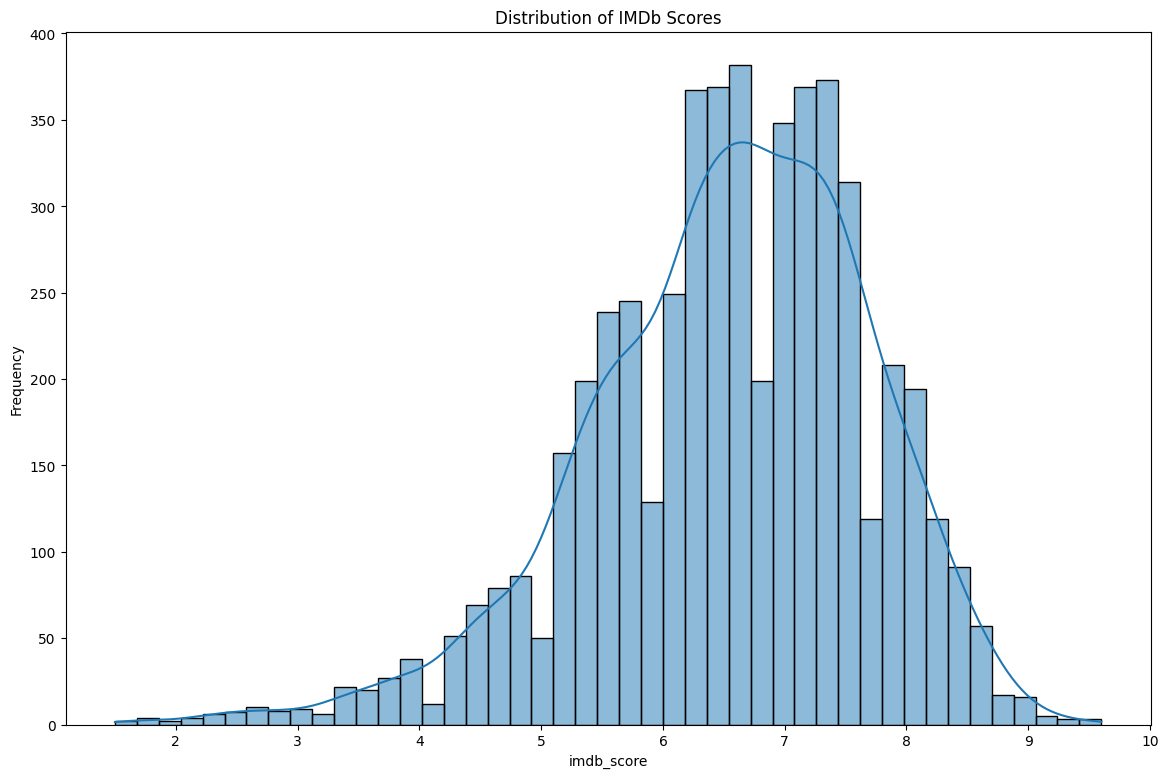

In [51]:
# Set the size of the figure
plt.figure(figsize=(14, 9))  # Adjust the dimensions as needed

# Visualizing distribution of IMDb scores
sns.histplot(df['imdb_score'],kde=True)
plt.xlabel('imdb_score')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Scores')
plt.show

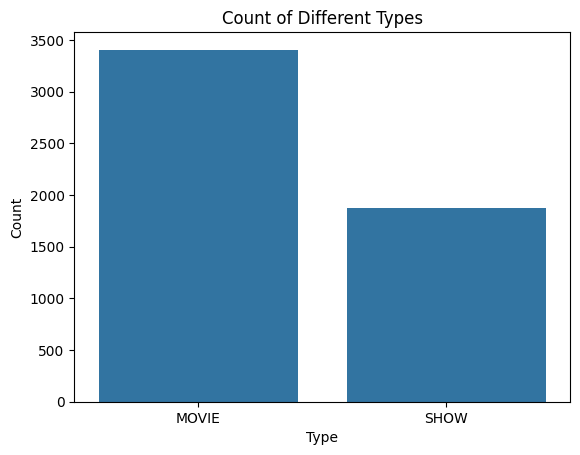

In [52]:
# Count of different types (MOVIE, SHOW, etc.)
sns.countplot(x='type', data=df)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Different Types')
plt.show()


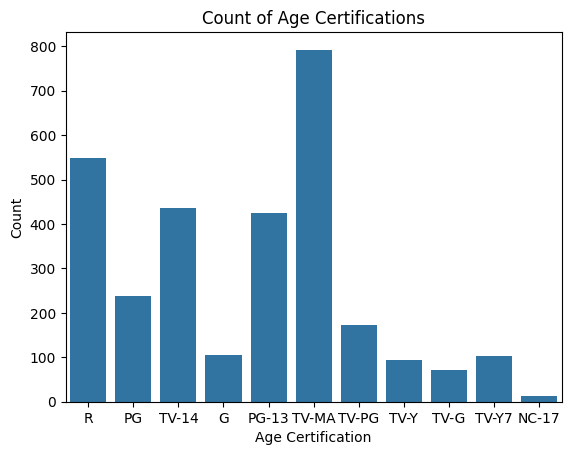

In [53]:

# Count of age certifications
sns.countplot(x='age_certification', data=df)
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.title('Count of Age Certifications')
plt.show()

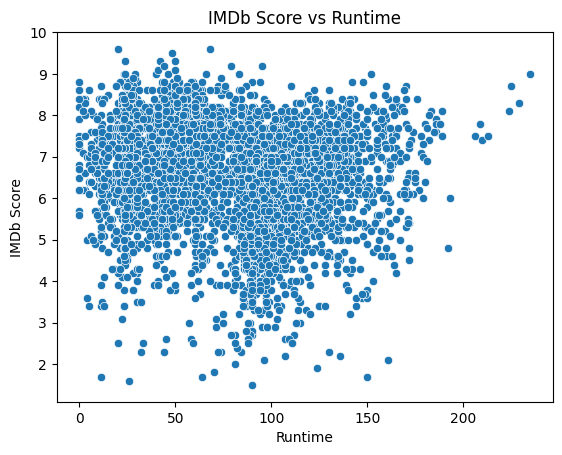

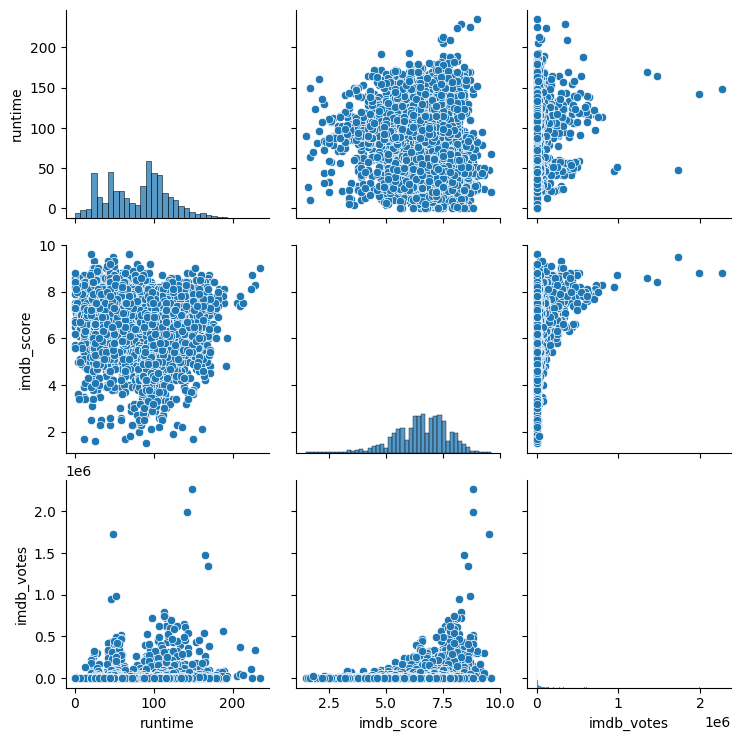

In [54]:
# Relationship between IMDb score and runtime
sns.scatterplot(x='runtime', y='imdb_score', data=df)
plt.xlabel('Runtime')
plt.ylabel('IMDb Score')
plt.title('IMDb Score vs Runtime')
plt.show()

# Pairwise relationships between numerical variables
sns.pairplot(df[['runtime', 'imdb_score', 'imdb_votes']])
plt.show()

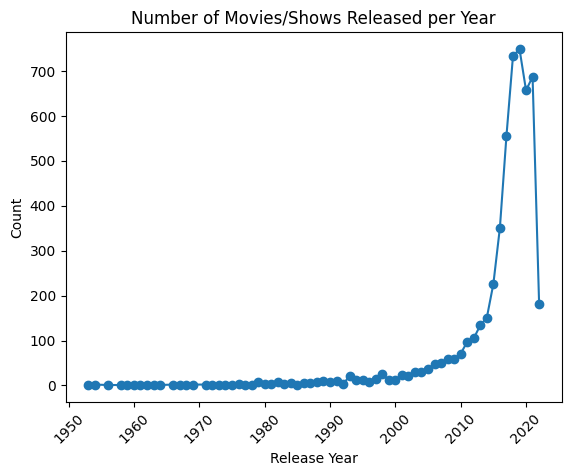

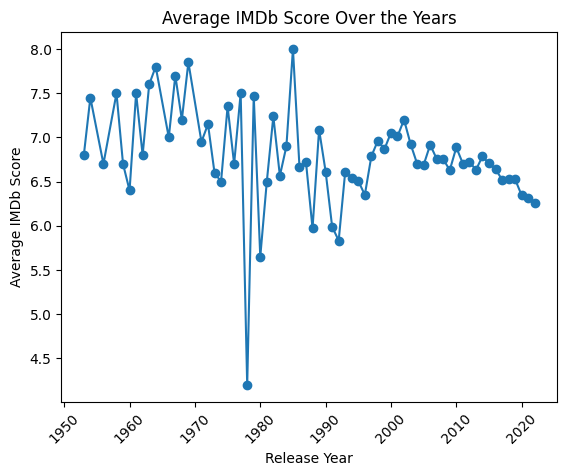

In [55]:
# Number of movies/shows released per year
yearly_counts = df['release_year'].value_counts().sort_index()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Number of Movies/Shows Released per Year')
plt.xticks(rotation=45)
plt.show()

# Average IMDb scores over the years
yearly_mean_score = df.groupby('release_year')['imdb_score'].mean()
plt.plot(yearly_mean_score.index, yearly_mean_score.values, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score Over the Years')
plt.xticks(rotation=45)
plt.show()

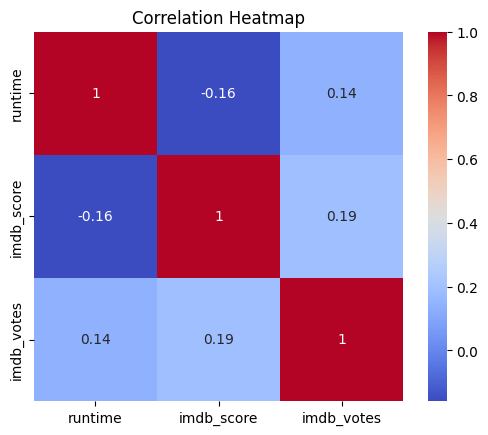

In [56]:
# Correlation heatmap
correlation = df[['runtime', 'imdb_score', 'imdb_votes']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

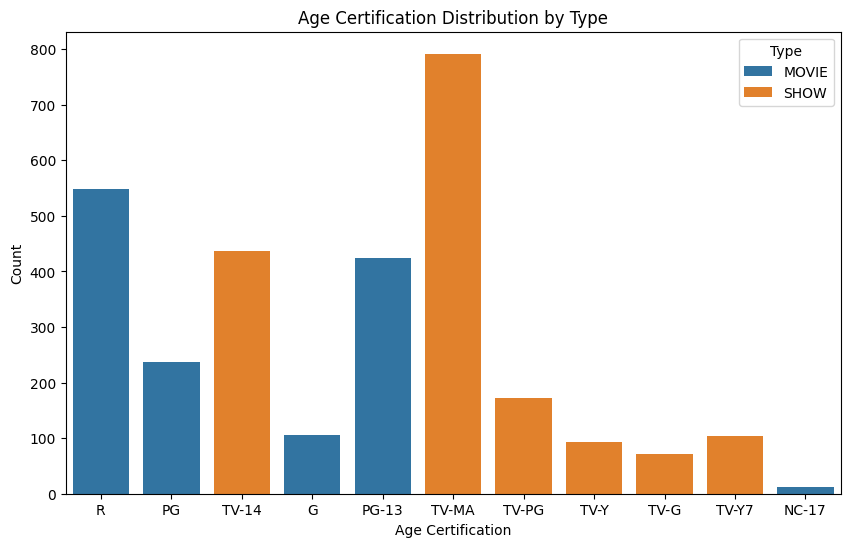

In [57]:
# Age certification distribution by type
plt.figure(figsize=(10, 6))
sns.countplot(x='age_certification', hue='type', data=df)
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.title('Age Certification Distribution by Type')
plt.legend(title='Type')
plt.show()

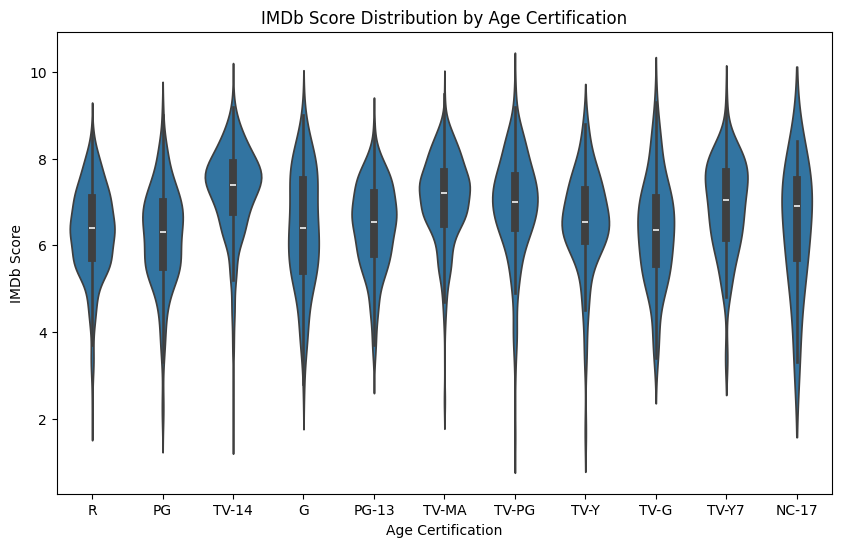

In [58]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='age_certification', y='imdb_score', data=df)
plt.xlabel('Age Certification')
plt.ylabel('IMDb Score')
plt.title('IMDb Score Distribution by Age Certification')
plt.show()

In [59]:
import plotly.express as px

# Scatter plot for IMDb scores vs. IMDb votes
fig = px.scatter(df, x='imdb_votes', y='imdb_score', title='IMDb Scores vs. IMDb Votes')
fig.update_layout(xaxis_title='IMDb Votes', yaxis_title='IMDb Score')
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed